### Artificial neural network main

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.datasets import fetch_openml
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from yellowbrick.model_selection import learning_curve



In [2]:
X_mnist, y_mnist = fetch_openml(name='Fashion-MNIST',return_X_y=True, as_frame=False)

In [3]:
#data splitting and standardizing
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2)
X_train, X_test = X_train / 255. , X_test / 255.

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [5]:
# logreg = LogisticRegression(max_iter=500)
# logreg.fit(X_train, y_train.flatten())
# print('Training accuracy: ', round(logreg.score(X_train, y_train.flatten()),2))
# print('Testing accuracy: ', round(logreg.score(X_test, y_test.flatten()),2))


In [6]:
#code taken from lab 2
nn_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=0,
                    learning_rate_init=1e-3,
                    max_iter=200,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf.fit(X_train, y_train.flatten())

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0, hidden_layer_sizes=64, n_iter_no_change=25,
              random_state=1, solver='sgd')

Text(0, 0.5, 'Loss')

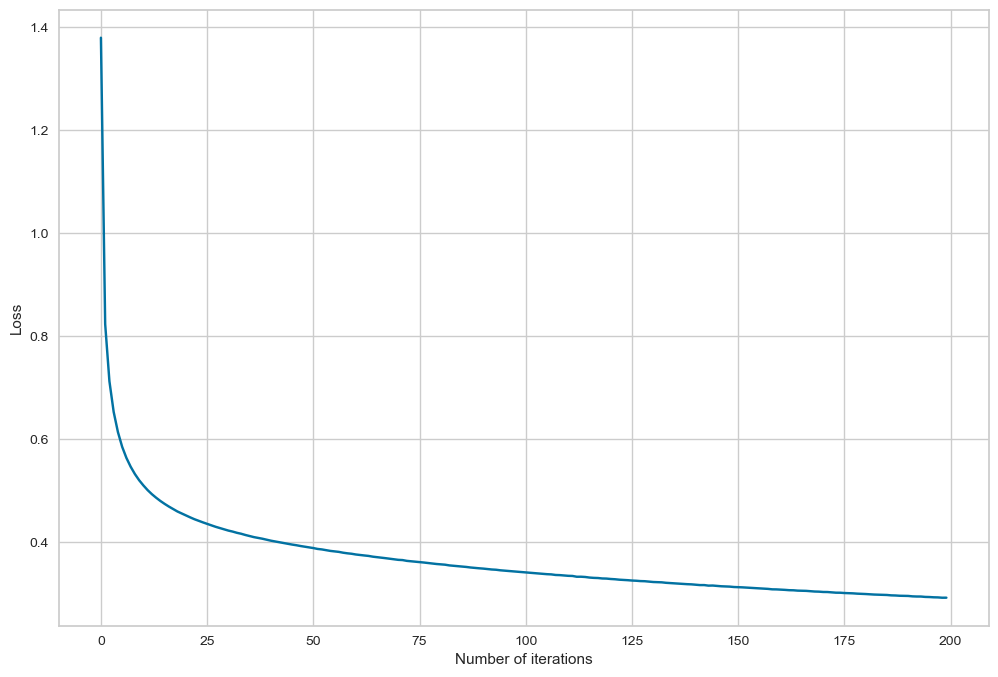

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nn_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [27]:
ax.plot(nn_clf.validation_curve_)

SyntaxError: unexpected EOF while parsing (1386197029.py, line 1)

In [25]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(nn_clf.learning_rate)
# ax.set_xlabel('Number of iterations')
# ax.set_ylabel('Loss')
#testing accuracy
nn_clf.score(X_test, y_test)

0.8768571428571429

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

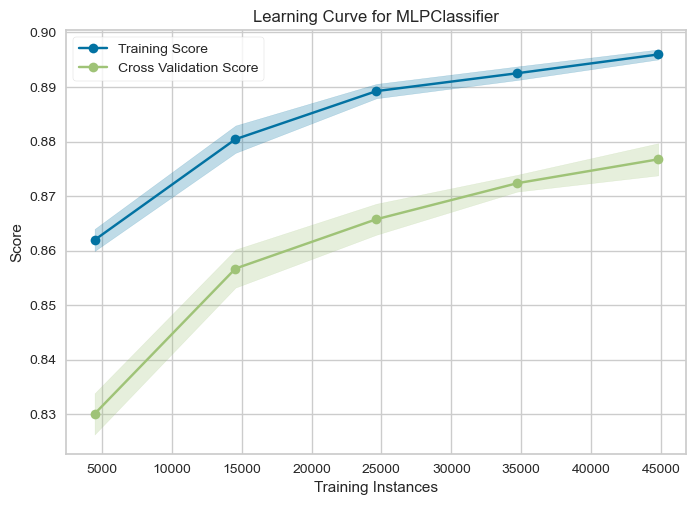

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
learning_curve(nn_clf, X_train, y_train, scoring='accuracy')

In [8]:
nn_clf.get_params

<bound method BaseEstimator.get_params of MLPClassifier(alpha=0, hidden_layer_sizes=64, n_iter_no_change=25,
              random_state=1, solver='sgd')>

In [9]:
# param_grid = dict(
# alpha=[0,1,10,40,100],
# hidden_layer_sizes=[64,128,256,512],
# max_iter=[100,300,1000],
# n_iter_no_change=[25,30,50,100])
alphas = np.logspace(-3, 0, 10)
learning_rates = np.logspace(-4, -2, 100)
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

In [12]:
randomized_search = RandomizedSearchCV(estimator=nn_clf, param_distributions=parameters, n_iter=1, cv=2, verbose=1, scoring='accuracy')

In [13]:
best_model = randomized_search.fit(X_train, y_train.flatten())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
a = best_model.best_params_['alpha']
b = best_model.best_params_['learning_rate_init']
a,b

(0.1, 0.009111627561154896)

In [15]:
ANN_clf = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    alpha=a,
                    learning_rate_init=b,
                    max_iter=50,
                    n_iter_no_change=7,
                    random_state=1)
ANN_clf.fit(X_train, y_train.flatten())

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=64,
              learning_rate_init=0.009111627561154896, max_iter=50,
              n_iter_no_change=7, random_state=1, solver='sgd')

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_per

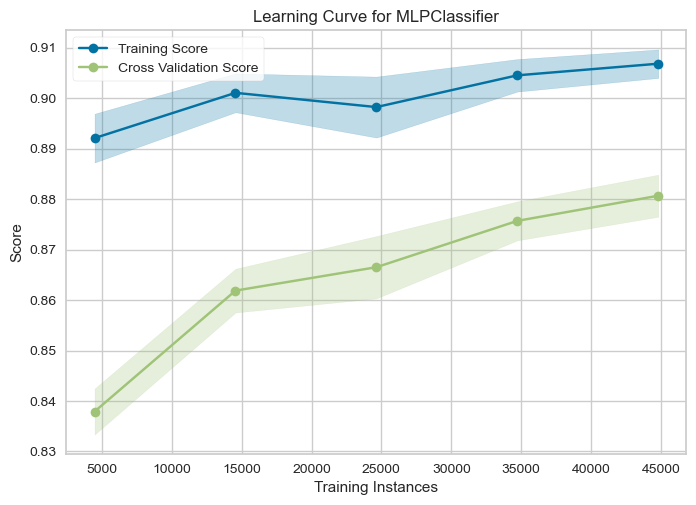

TypeError: cannot unpack non-iterable LearningCurve object

In [16]:
learning_curve(ANN_clf, X_train, y_train, scoring='accuracy')